# Retail Data Analytics


One of the main challenges in retail industry is to identify the  kind of markdowns or promotions that needs to be provided during the ever important holiday season to the customer.  Most of the companies in retail industry tend to take a hit on the bottom line sales during holiday season to entice customers into the store. This problem has become even more true for brick and mortar stores due to advances in online shopping.


The dataset that I have chosen contains 45 stores and historic sales for each one of those stores spread across  several years with various other features.

The model developed would predict which departments will be affected and to what extent during the key holiday time frames so that executives and marketing department can make informed and data-driven decisions about markdown amounts to preserve margins.

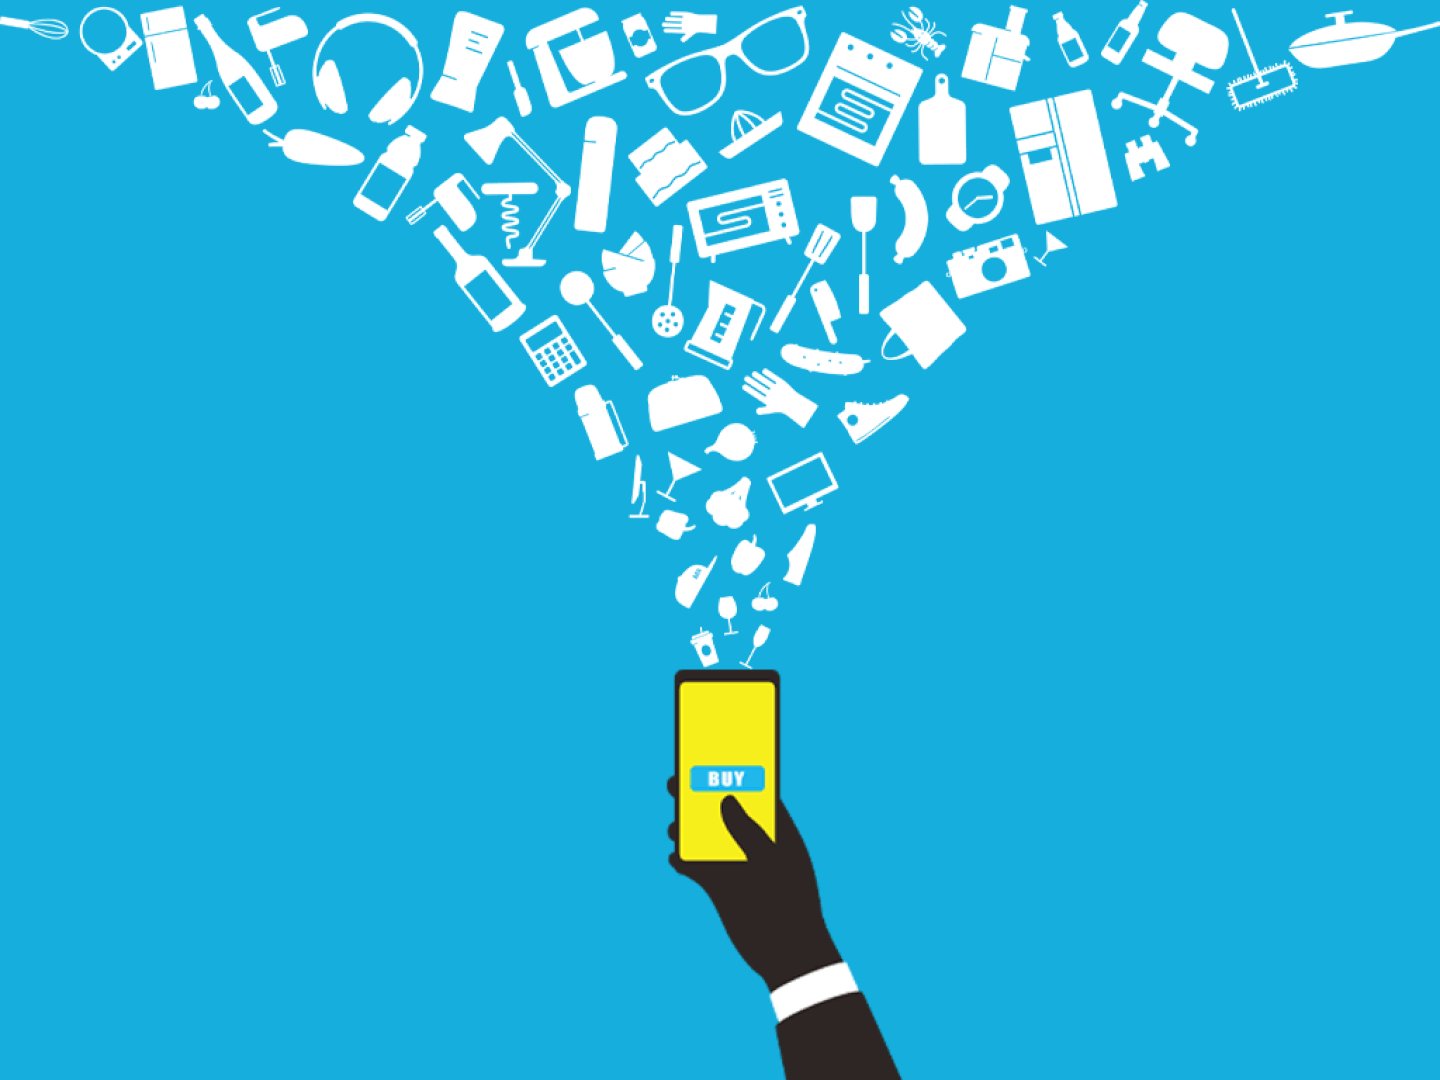

source: https://www.kaggle.com/manjeetsingh/retaildataset

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Lasso,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import svm

### Exploratory Data Analysis:


Performing Exploratory Data Analysis and undertsnading data well.


Steps:

1. Inspecting the shape, details of columns of the dataset.


2. Checking for duplicate values.


3. Checking for null values, replacing them with values, if applicable.


4. Dropping irrelavant columns.

In [2]:
stores_data =pd.read_csv(r'C:\Users\home\Downloads\stores.csv')
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [3]:
print(len(stores_data))
stores_data.isna().sum()

45


Store    0
Type     0
Size     0
dtype: int64

In [4]:
stores_data.shape

(45, 3)

In [5]:
features_df = pd.read_csv(r'C:\Users\home\Downloads\features.csv')
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
features_df.Store.value_counts()

43    182
41    182
33    182
29    182
25    182
21    182
17    182
13    182
9     182
5     182
1     182
44    182
40    182
36    182
32    182
28    182
24    182
20    182
16    182
12    182
8     182
37    182
45    182
39    182
2     182
35    182
31    182
27    182
23    182
19    182
15    182
11    182
7     182
3     182
42    182
38    182
34    182
30    182
26    182
22    182
18    182
14    182
10    182
6     182
4     182
Name: Store, dtype: int64

In [7]:
print(features_df.MarkDown3.mean())
print(features_df.MarkDown3.median())


1760.1001799058915
36.26


In [8]:
print(len(features_df))
features_df.isna().sum()

8190


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
features_df.shape

(8190, 12)

In [10]:
sales_df = pd.read_csv(r'C:\Users\home\Downloads\sales.csv')
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [11]:
len(sales_df.Store.value_counts().keys())

45

In [12]:
print(len(sales_df))
sales_df.isna().sum()

421570


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [13]:
sales_df.shape

(421570, 5)

In [14]:
#temp_df = pd.concat([sales_df,features_df],axis=1)
len(sales_df[sales_df.Store == 2][sales_df.Dept == 2])

C:\Users\home\anaconda3\ANACONDA3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


143

## Observations:



1. Shape of the data; 
        Store: 45 rows, 3 columns
        Sales: 421570 rows, 5 columns
        Features: 8190 rows, 12 columns


2. The sales and features datasets have Store,Date and IsHoliday in common, of which store and Date are numerical and IsHoliday a categorical column.


3.  The column 'Store' acts as a key to merge all the datasets.



In [15]:
final = sales_df.merge(features_df, how='left', on =['Store','Date'])
final = final.merge(stores_data,how='left', on = ['Store'])
final.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [16]:
final.shape

(421570, 17)

In [17]:
final_report = sv.analyze(final)

:FEATURES DONE:                    |█████████████████████| [100%]   00:11  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:19  -> (00:00 left)


Creating Associations graph... DONE!


In [18]:
final_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [19]:
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [20]:
final.shape

(421570, 17)

In [21]:
# Get names of indexes for weekly sales <=0
indexNames = final[final['Weekly_Sales'] <= 0].index
# Delete these row indexes from dataFrame
final.drop(indexNames , inplace=True)

final.shape

(420212, 17)

#### Missing values analysis

In [22]:
final.drop_duplicates()
final.shape

(420212, 17)

In [23]:
final.drop(['IsHoliday_y'],axis=1,inplace=True)
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [24]:
temp=[]
for a in final.keys():
    if not pd.api.types.is_numeric_dtype(final[a]):
        final[a]=final[a].astype('category').cat.as_ordered()
        temp.append(a)
print(temp)
len(temp)

['Date', 'Type']


2

#### Imputing missing values with median

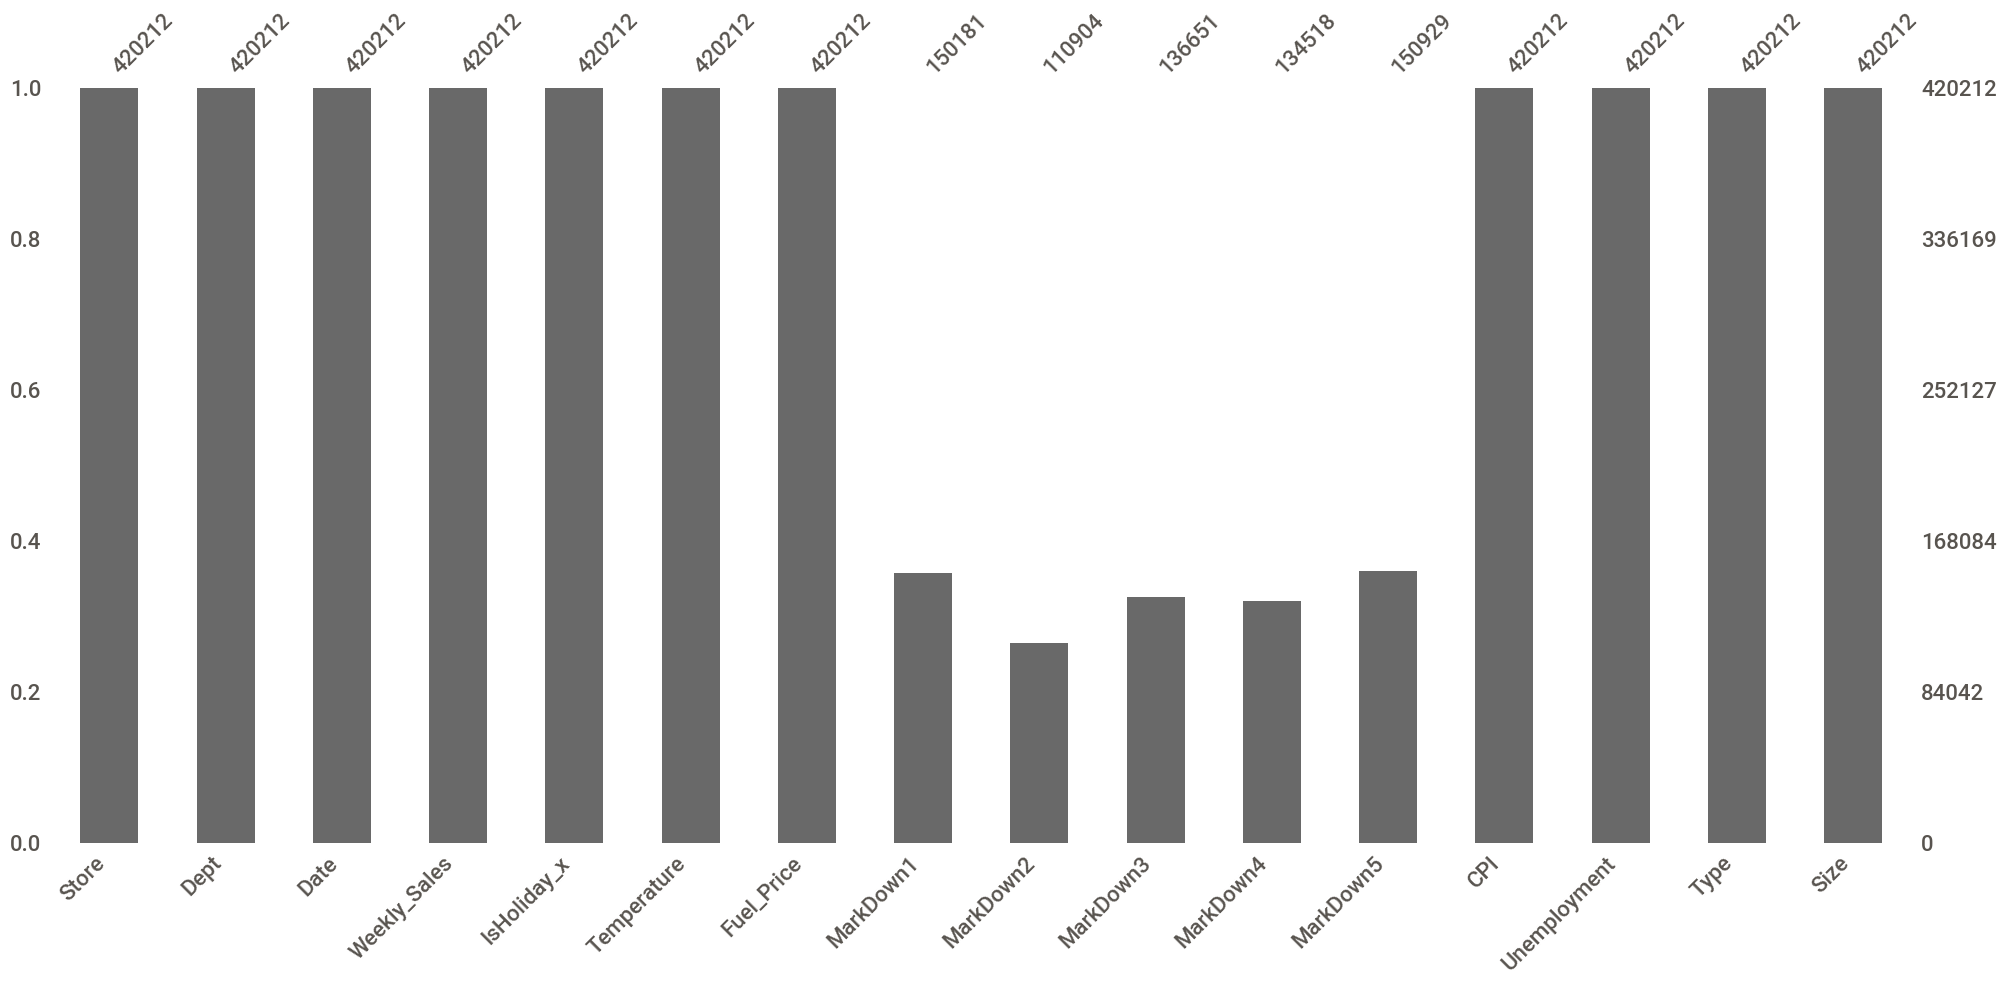

In [25]:
import missingno as msno
msno.bar(final);

In [26]:
for a in final.keys():
    if pd.api.types.is_numeric_dtype(final[a]):
        if final[a].isna().sum()>0:
            final[a].fillna(final[a].mean(),inplace=True)
            print(a,final[a].isna().sum())

MarkDown1 0
MarkDown2 0
MarkDown3 0
MarkDown4 0
MarkDown5 0


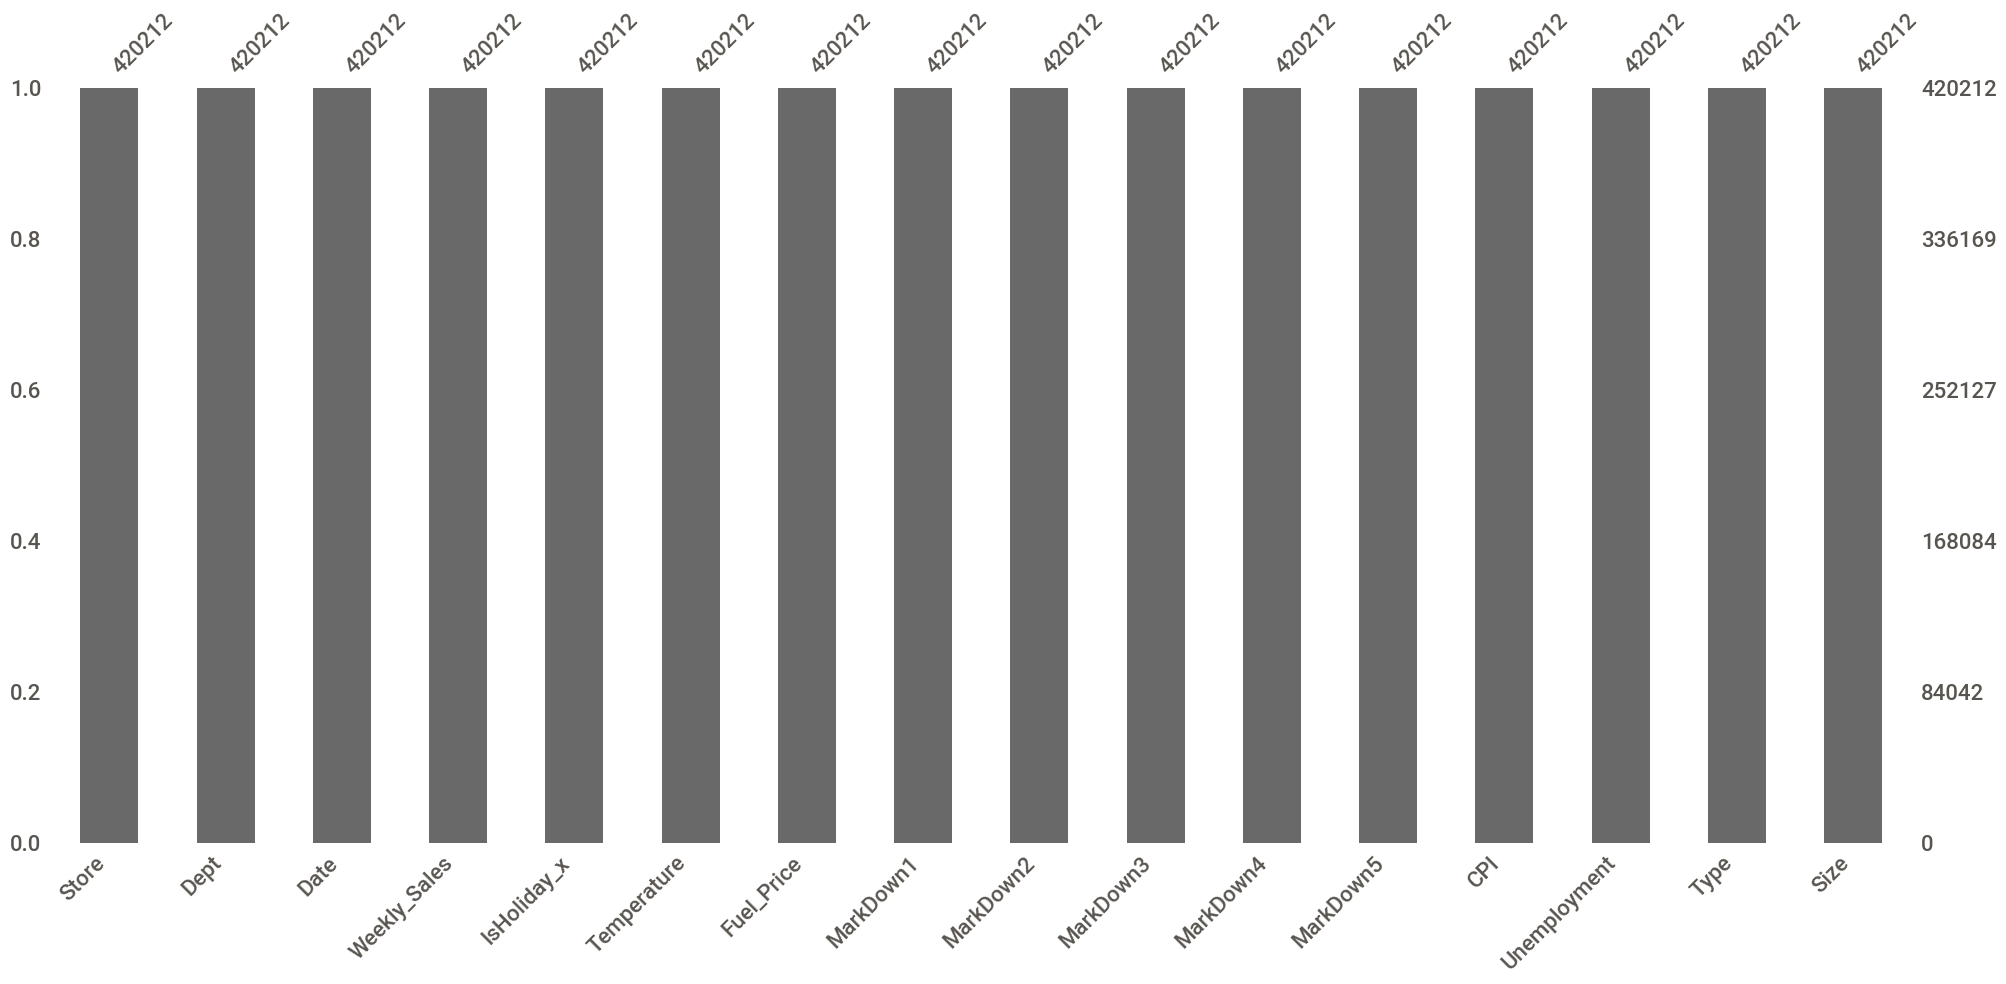

In [27]:
msno.bar(final);

In [28]:
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,211.350143,8.106,A,151315


In [29]:
final.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

#### Outlier Analysis:

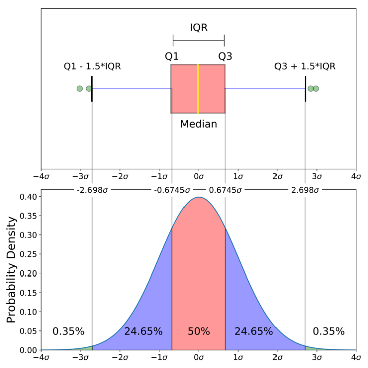





In [30]:
Q1 = final["CPI"].quantile(0.25)
Q3 = final["CPI"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [31]:
print("lower", lower)

lower 11.388436249999984


In [32]:
print("upper", upper)

upper 333.07971745000003


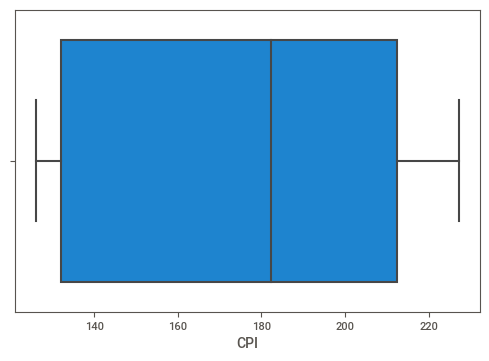

In [33]:
sns.boxplot(x=final["CPI"])

In [34]:
final[(final["CPI"] > upper)].shape

(0, 16)

In [35]:
final[(final["CPI"] < lower)].shape

(0, 16)

#### Taking 10% of data

In [36]:
final_10= final.sample(frac=0.1, random_state=1)
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,211.350143,8.106,A,151315


In [37]:
final_10.shape

(42021, 16)

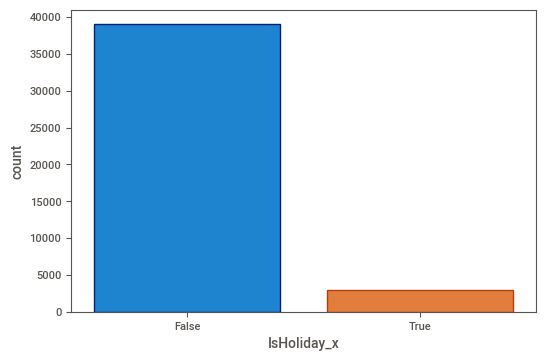

In [38]:
sns.countplot(x='IsHoliday_x', data=final_10,edgecolor=sns.color_palette("dark", 3))

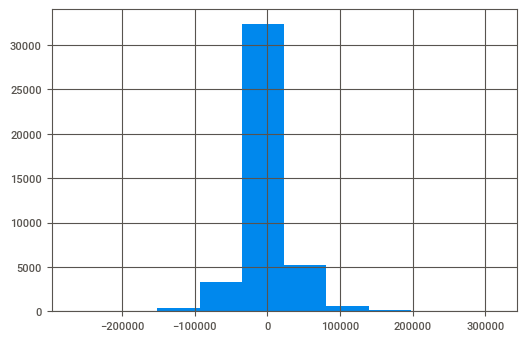

In [39]:
# Weekly Diff of sales distributed normally
plt.figure()
final_10['Weekly_Sales'].diff().hist()

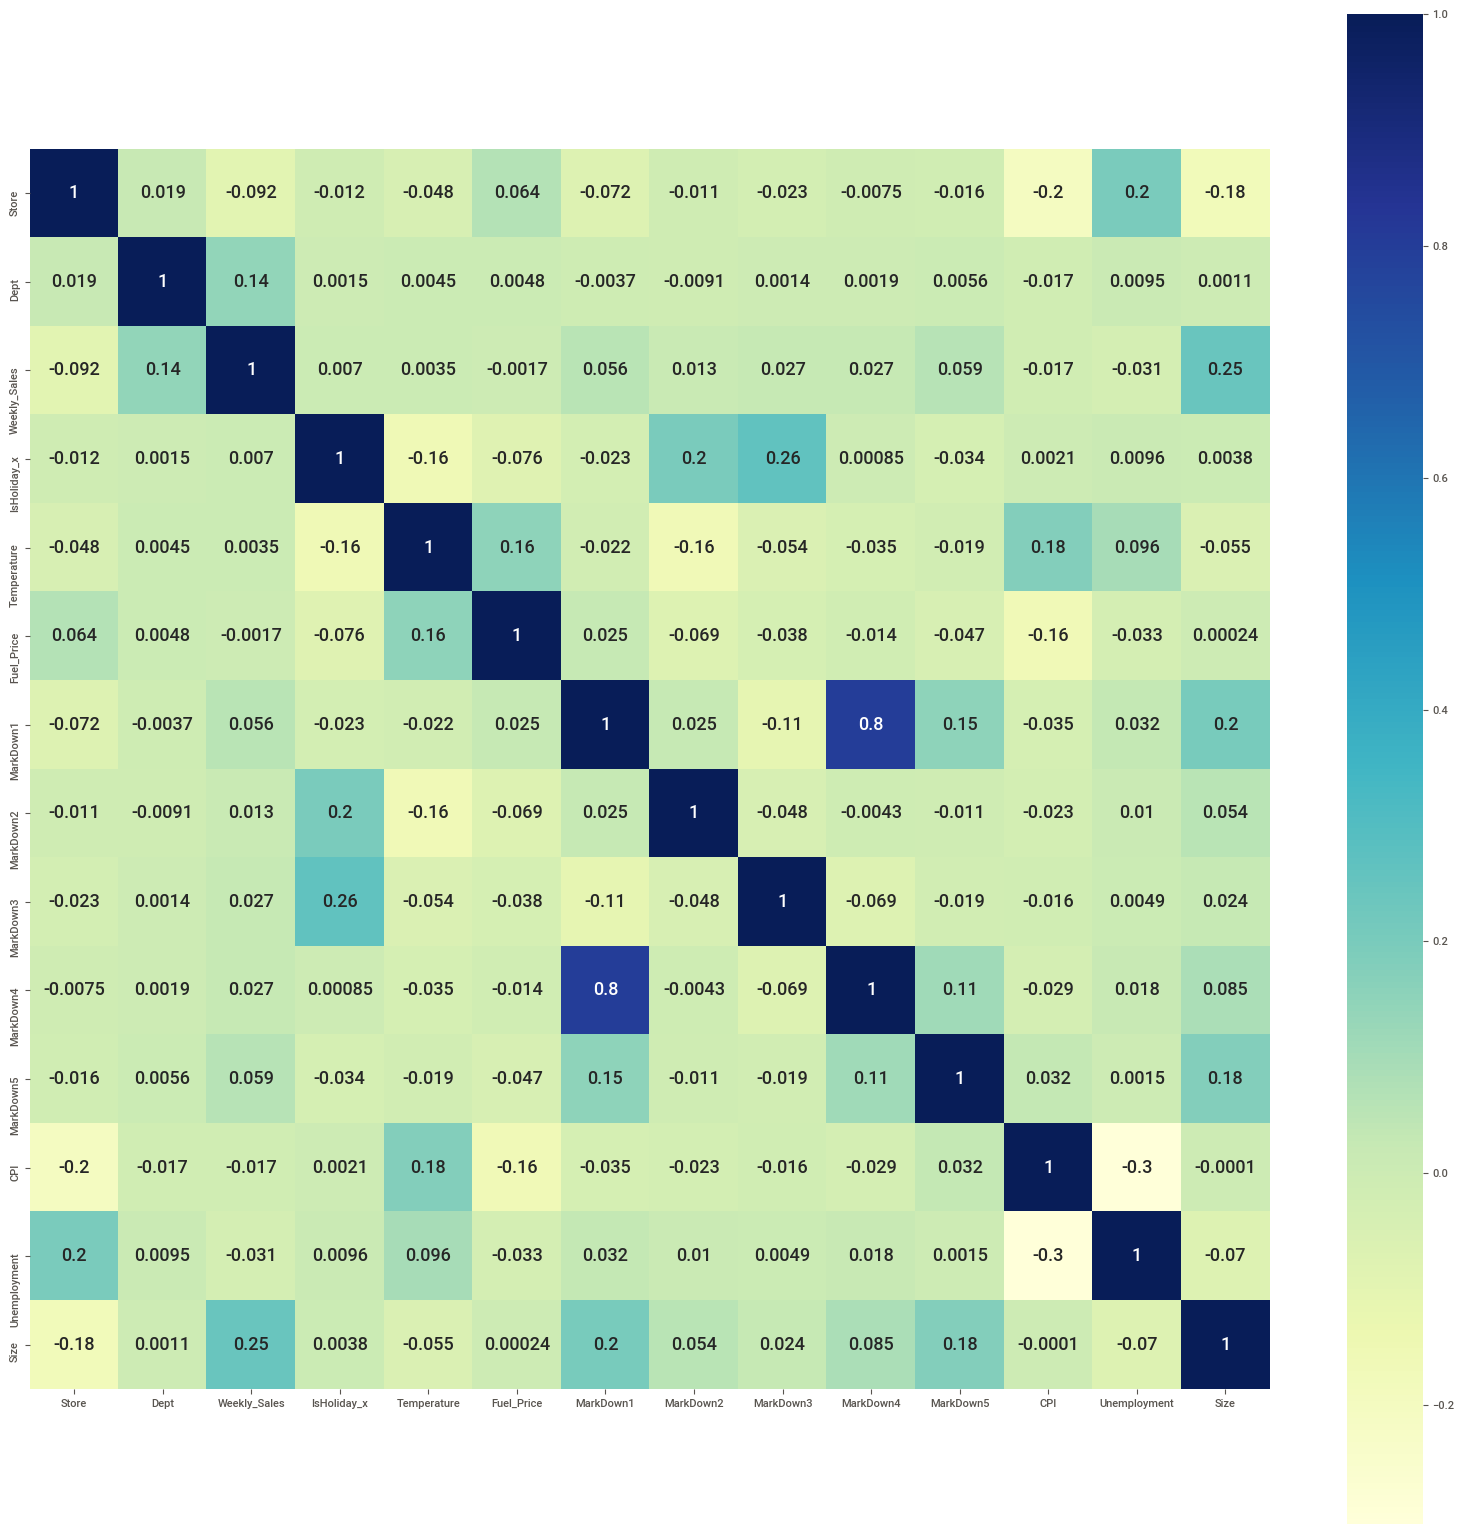

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(final_10.corr(),annot=True,annot_kws={'size':13},square=True,cmap="YlGnBu")

In [41]:
weekly_average_sales = final.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
average_sales = weekly_average_sales.sort_values('Weekly_Sales', ascending=False)



In [42]:
final_10['year1'] = pd.DatetimeIndex(final_10['Date']).year*100+pd.DatetimeIndex(final_10['Date']).month
final_10.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year1
274009,28,59,13/04/2012,185.73,False,64.28,4.254,8478.140000,5630.150000,20.530000,2457.880000,9394.39000,131.108000,11.627,A,206302,201204
330245,34,95,02/12/2011,62237.69,False,39.75,3.176,4611.570000,70.940000,1109.590000,1307.670000,17316.01000,129.845967,10.148,A,158114,201102
78823,9,2,16/07/2010,22415.59,False,82.93,2.623,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,214.647445,6.442,B,125833,201007
31137,4,12,24/12/2010,6069.23,False,43.21,2.887,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,126.983581,7.127,A,205863,201012
399930,43,16,12/02/2010,4099.41,True,47.99,2.548,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,203.201097,9.521,C,41062,201012


In [43]:
final_10['year'] = pd.DatetimeIndex(final_10['Date']).year
final_10.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year1,year
274009,28,59,13/04/2012,185.73,False,64.28,4.254,8478.140000,5630.150000,20.530000,2457.880000,9394.39000,131.108000,11.627,A,206302,201204,2012
330245,34,95,02/12/2011,62237.69,False,39.75,3.176,4611.570000,70.940000,1109.590000,1307.670000,17316.01000,129.845967,10.148,A,158114,201102,2011
78823,9,2,16/07/2010,22415.59,False,82.93,2.623,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,214.647445,6.442,B,125833,201007,2010
31137,4,12,24/12/2010,6069.23,False,43.21,2.887,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,126.983581,7.127,A,205863,201012,2010
399930,43,16,12/02/2010,4099.41,True,47.99,2.548,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,203.201097,9.521,C,41062,201012,2010


In [44]:
final_10['month'] = pd.DatetimeIndex(final_10['Date']).month
final_10.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year1,year,month
274009,28,59,13/04/2012,185.73,False,64.28,4.254,8478.140000,5630.150000,20.530000,2457.880000,9394.39000,131.108000,11.627,A,206302,201204,2012,4
330245,34,95,02/12/2011,62237.69,False,39.75,3.176,4611.570000,70.940000,1109.590000,1307.670000,17316.01000,129.845967,10.148,A,158114,201102,2011,2
78823,9,2,16/07/2010,22415.59,False,82.93,2.623,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,214.647445,6.442,B,125833,201007,2010,7
31137,4,12,24/12/2010,6069.23,False,43.21,2.887,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,126.983581,7.127,A,205863,201012,2010,12
399930,43,16,12/02/2010,4099.41,True,47.99,2.548,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,203.201097,9.521,C,41062,201012,2010,12


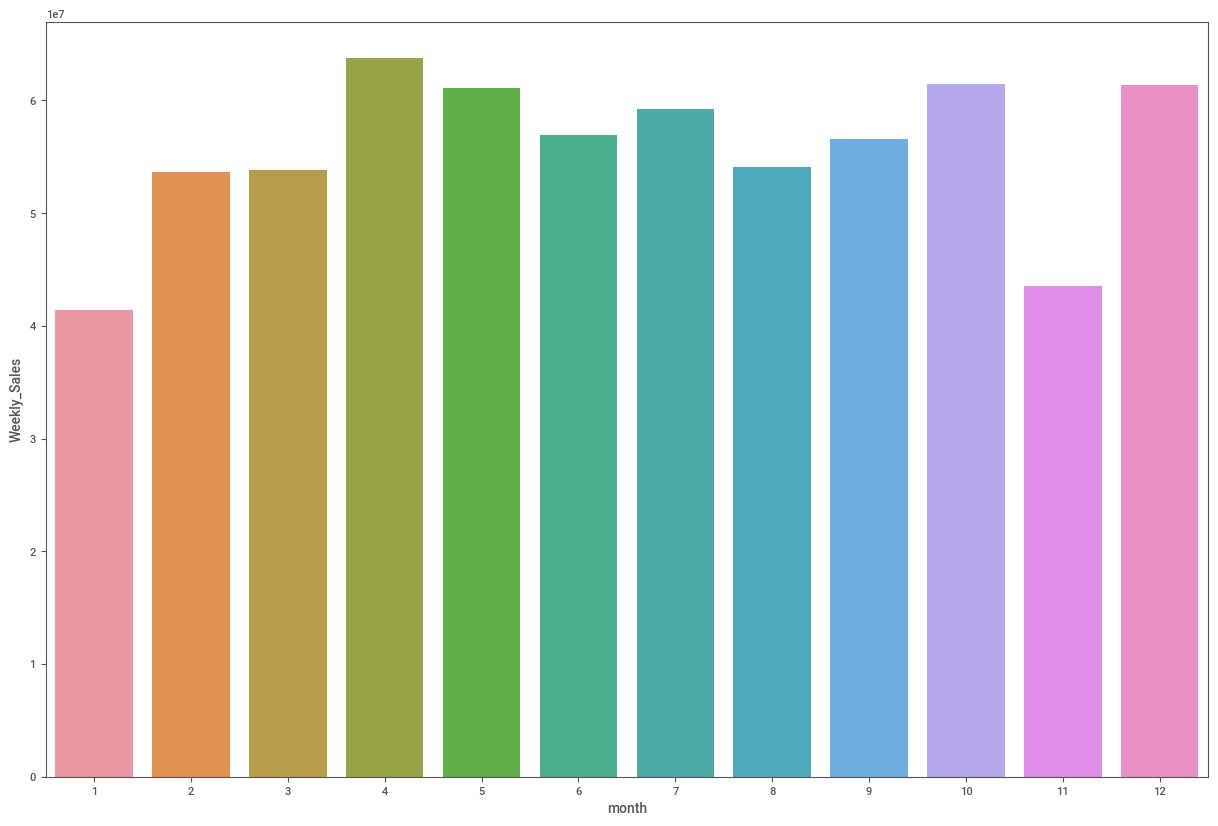

In [45]:
data_sales_month = final_10.groupby(final_10['month']).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(15, 10))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales)

Text(0, 0.5, 'Sales')

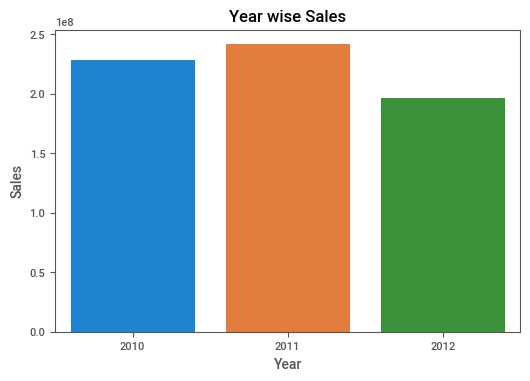

In [46]:
sales_year = final_10.groupby(final_10['year']).agg({"Weekly_Sales":"sum"})

sns.barplot(x=sales_year.index,y=sales_year.Weekly_Sales)
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

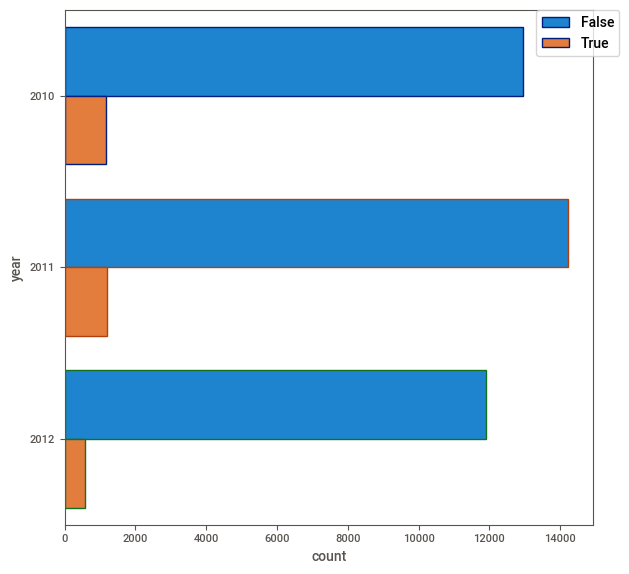

In [47]:
fig=plt.figure(figsize=(15,15))
sns.set_context( font_scale=1.8) 

ax1=fig.add_subplot(221)
ax1=sns.countplot(y='year',hue='IsHoliday_x', data=final_10,edgecolor=sns.color_palette("dark", 3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)




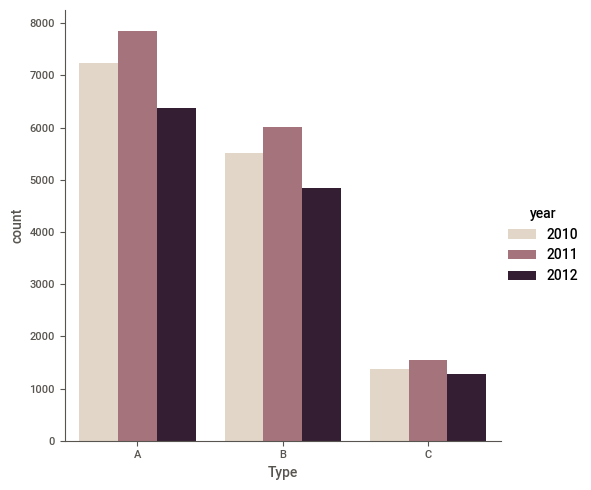

In [48]:
sns.catplot(x="Type", hue='year',kind="count", palette="ch:.25", data=final_10)

C:\Users\home\anaconda3\ANACONDA3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


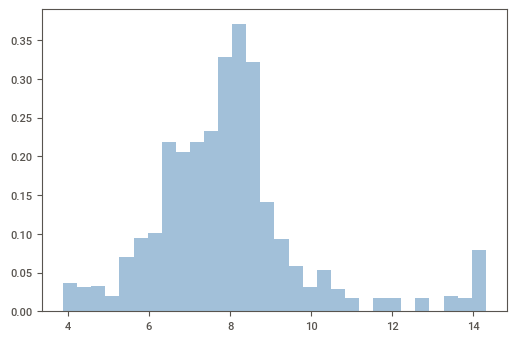

In [49]:
plt.hist(final_10['Unemployment'], bins=30, normed=True, alpha=0.5,histtype='stepfilled', color='steelblue', edgecolor='none');

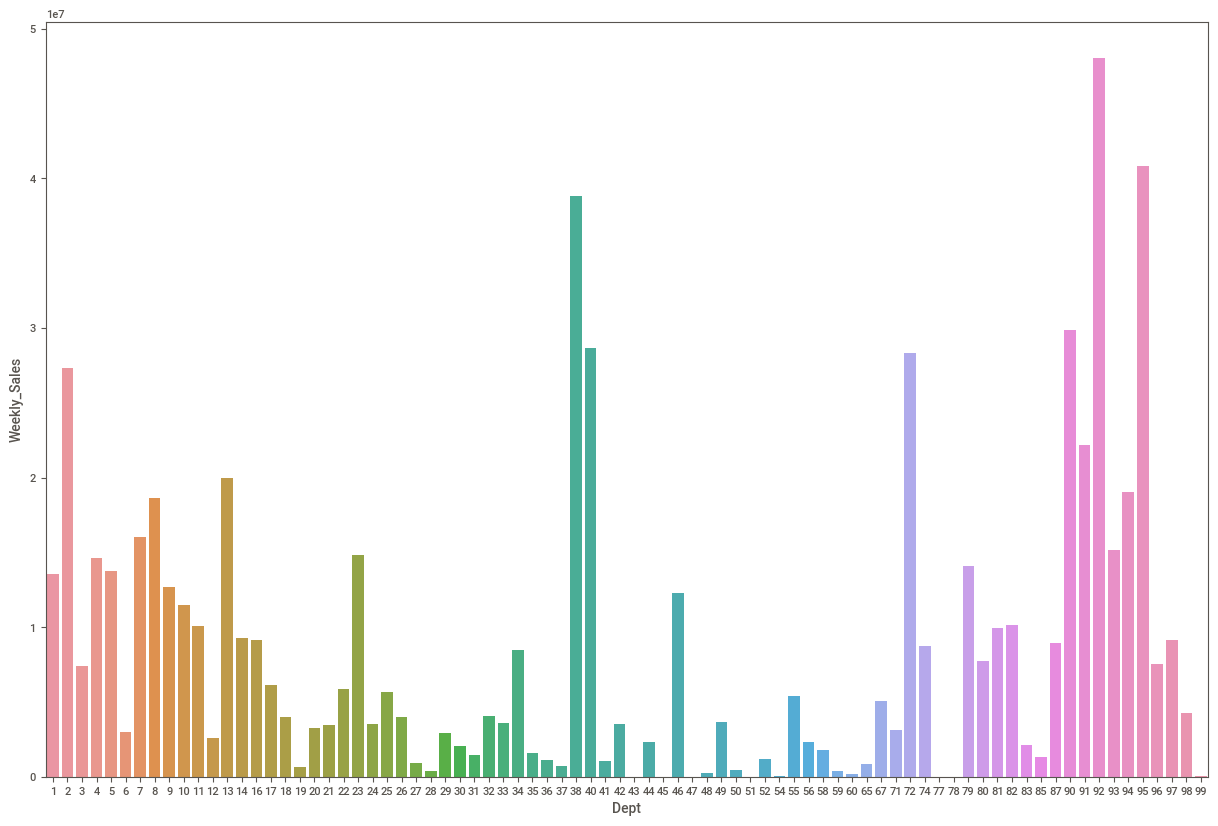

In [50]:
dept_sales = final_10.groupby(final_10['Dept']).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(15, 10))
sns.barplot(x=dept_sales.index,y=dept_sales.Weekly_Sales)

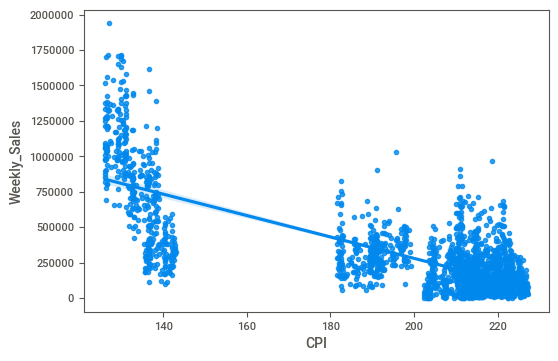

In [51]:
data_sales_CPI = final_10.groupby(final_10['CPI']).agg({"Weekly_Sales":"sum"})
sns.regplot(x=data_sales_CPI.index, y=data_sales_CPI.Weekly_Sales)

### One hot encoding

Converting categorical variable into numerical. 
1 being YES and 0 being NO.

In [52]:
to_Integer=final['IsHoliday_x']
gender_encoder = LabelEncoder()
to_Integer = gender_encoder.fit_transform(to_Integer)
to_Integer

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### Feature Scaling

Some algorithms like Linear regression, logistic regression that uses gradient descent as an optimization technique require data to be scaled.


Having features on a similar scale can help the gradient descent converge more quickly towards the minima.


The feature scaling that done here is standardization.

In [53]:
y = final_10["Weekly_Sales"]
X = final_10.drop(["Weekly_Sales",'Date','Type'], axis = 1)
cols = X.columns
index = X.index

In [54]:
y.head()

274009      185.73
330245    62237.69
78823     22415.59
31137      6069.23
399930     4099.41
Name: Weekly_Sales, dtype: float64

In [55]:
X.head()

,Store,Dept,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,year1,year,month
274009,28,59,False,64.28,4.254,8478.140000,5630.150000,20.530000,2457.880000,9394.39000,131.108000,11.627,206302,201204,2012,4
330245,34,95,False,39.75,3.176,4611.570000,70.940000,1109.590000,1307.670000,17316.01000,129.845967,10.148,158114,201102,2011,2
78823,9,2,False,82.93,2.623,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,214.647445,6.442,125833,201007,2010,7
31137,4,12,False,43.21,2.887,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,126.983581,7.127,205863,201012,2010,12
399930,43,16,True,47.99,2.548,7247.821269,3330.146158,1441.736203,3384.782267,4629.53187,203.201097,9.521,41062,201012,2010,12


In [56]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [57]:
X.head()

,Store,Dept,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,year1,year,month
274009,0.272727,0.392857,0.0,0.079957,0.998761,1230.318731,2300.003842,-1.078505,-926.902267,4764.85813,-0.639320,2.203638,0.607484,0.510417,0.5,-0.4
330245,0.545455,1.035714,0.0,-0.807525,-0.337051,-2636.251269,-3259.206158,-0.252054,-2077.112267,12686.47813,-0.655037,1.335681,0.164853,-0.020833,0.0,-0.8
78823,-0.590909,-0.625000,0.0,0.754703,-1.022305,0.000000,0.000000,0.000000,0.000000,0.00000,0.401082,-0.839202,-0.131665,-0.515625,-0.5,0.2
31137,-0.818182,-0.446429,0.0,-0.682344,-0.695167,0.000000,0.000000,0.000000,0.000000,0.00000,-0.690686,-0.437207,0.603452,-0.489583,-0.5,1.2
399930,0.954545,-0.375000,1.0,-0.509407,-1.115242,0.000000,0.000000,0.000000,0.000000,0.00000,0.258529,0.967723,-0.910331,-0.489583,-0.5,1.2


### Modelling:



The following are the models used to evaluate accuracy:

1. Linear Regression.


2. Lasso Regressor.


3. Ridge Regressor.


4. Decision Tree Regressor.


5. Gradient Boosting Algorithm.




In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

classifiers = [LinearRegression(),
                Lasso(alpha =16, random_state=100),
                RidgeCV(),
                DecisionTreeRegressor(max_depth=3),
                RandomForestRegressor(),
                GradientBoostingRegressor()]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

In [59]:
final_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
final_score.set_index('name',inplace=True)
final_score.sort_values(by=['score'],inplace=True) 
final_score

,rmse,score,model
name,,,
LinearRegression,21159.832833,0.081062,"LinearRegression(copy_X=True, fit_intercept=Tr..."
RidgeCV,21159.666516,0.081077,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N..."
Lasso,21157.476757,0.081267,"Lasso(alpha=16, copy_X=True, fit_intercept=Tru..."
DecisionTreeRegressor,17600.642299,0.364203,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
GradientBoostingRegressor,11476.367816,0.729685,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
RandomForestRegressor,6298.483584,0.918580,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

classifiers = [LinearRegression(),
                Lasso(alpha =16, random_state=100),
                RidgeCV(),
                DecisionTreeRegressor(max_depth=9),
                RandomForestRegressor(min_samples_split=8,min_samples_leaf=3),
                GradientBoostingRegressor()]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

In [61]:
final_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
final_score.set_index('name',inplace=True)
final_score.sort_values(by=['score'],inplace=True) 
final_score

,rmse,score,model
name,,,
LinearRegression,21159.832833,0.081062,"LinearRegression(copy_X=True, fit_intercept=Tr..."
RidgeCV,21159.666516,0.081077,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=N..."
Lasso,21157.476757,0.081267,"Lasso(alpha=16, copy_X=True, fit_intercept=Tru..."
GradientBoostingRegressor,11476.367816,0.729685,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
DecisionTreeRegressor,10352.482589,0.780036,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
RandomForestRegressor,6303.769584,0.918443,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."


Root Mean Square Error: Reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy.

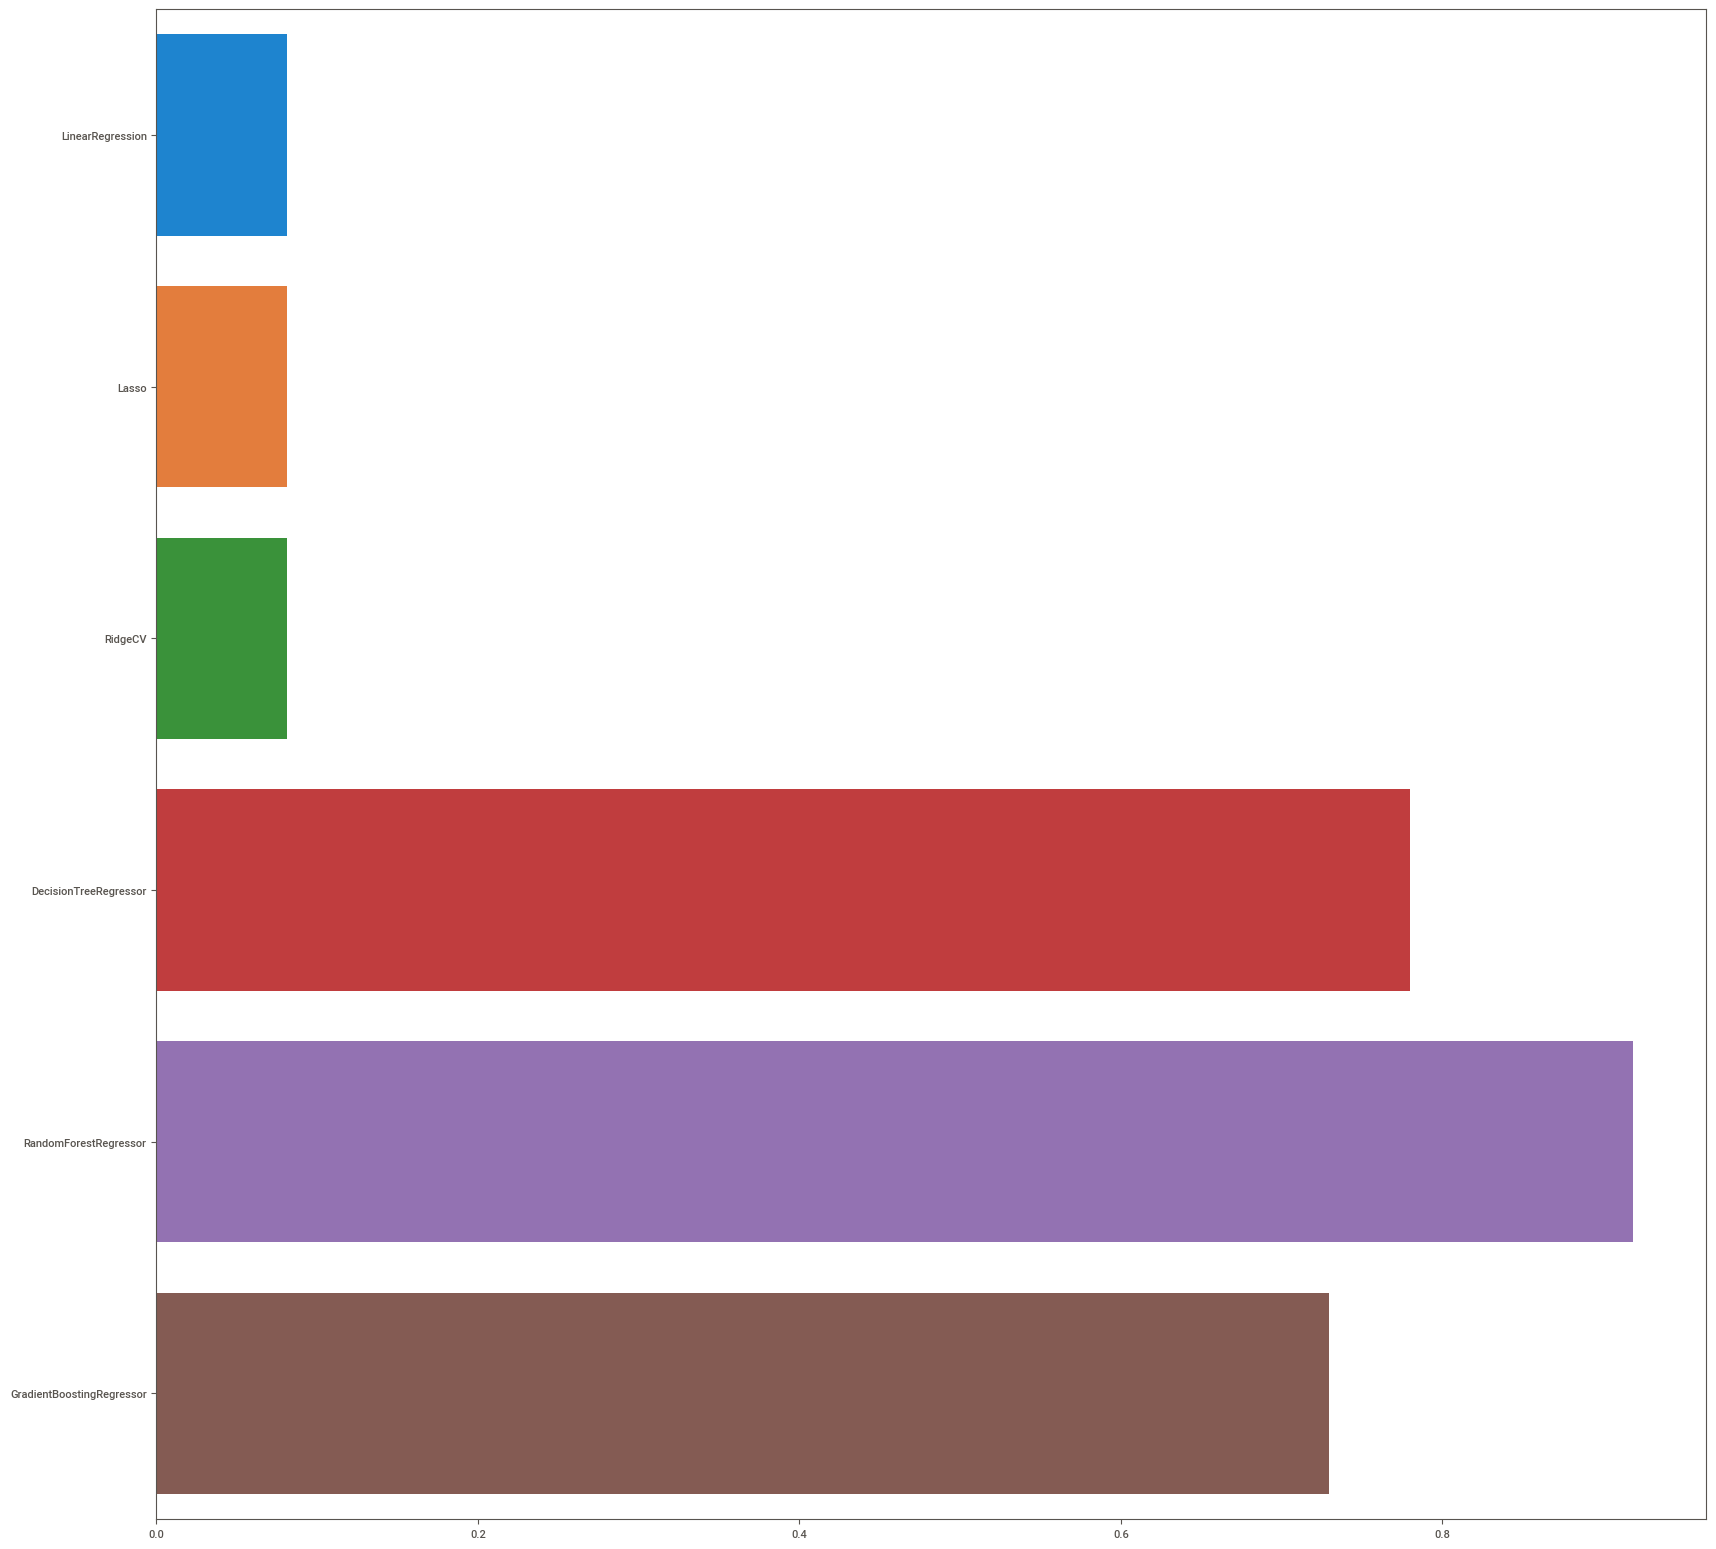

In [62]:
# Visually showing the accuracy

import matplotlib.font_manager
from matplotlib import rc

sns.set_context(font_scale=3.5)
plt.figure(figsize=(20,20))
sns.barplot(y=list(name), x=list(score))


In [63]:
print(name)
print(score)

['LinearRegression', 'Lasso', 'RidgeCV', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor']
[0.08106220262986619, 0.0812668325281275, 0.08107664838000339, 0.7800364764724458, 0.9184427992621743, 0.7296847370849527]


### Weekly_sales Prediction and deployment


In [64]:
X_pred_df = final_10[['IsHoliday_x','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] 
Y_pred_df = final_10['Weekly_Sales']

In [65]:
regr = RandomForestRegressor()
regr.fit(X_pred_df, Y_pred_df)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Deployment: 


Serialization is a process to send complex object hierarchies over a network or save the internal state of the objects to a disk or database for later use.


Python has three modules for serialization. One being Pickle, another on being Marshal and one more json. 


Here, I have used pickle to load the model and to read it.


In [66]:
#using pickle library to dump the model in the form of some extension
#dumped in write bytes mode

import pickle

pickle.dump(regr,open('model_dump.pkl','wb'))

In [67]:
#checking if prediction works fine

new_IsHoliday_x = 0
new_MarkDown1 = 10.4
new_MarkDown2 =13 
new_MarkDown3 = 11.7
new_MarkDown4 = 2.3
new_MarkDown5 = 1.9
y_pred=regr.predict([[new_IsHoliday_x,new_MarkDown1,new_MarkDown2,new_MarkDown3,new_MarkDown4,new_MarkDown5]])
print ('Predicted Weekly Sales: \n', y_pred)

Predicted Weekly Sales: 
 [9924.46778539]


Since 10% of the dataset is randomly picked, the result here varies from the deployed page.

In [68]:
model=pickle.load(open('model_dump.pkl','rb'))

#### Conclusion:

   There are several algorithms that are applied on the model to check which yields with better accuracy.

   As the target variable is continuous, the first algorithm that is being considered is Linear Regression – which yielded unfavourable score. I started tuning the model by changing hyperparameters. But then I felt like the manually tuning is an unnecessarily tedious approach.

   The next thing I did was to compare linear regression with Lasso and Ridge Regression. Lasso and Ridge are nothing but an extension of linear regression that adds regularization penalty to the loss function during training. As it is noticeable, all the three yielded almost same result.

   There are of course many regression algorithms that can be used. And the next algorithm that I went with was Decision Tree Regressor. When I tried tuning the tree manually, I got not-so-good results. With hyperparameter-max_depth being 3, I got an accuracy of 36% and with 9 I got 77%.

   Since Decision Tree did not yield a good result, I chose one of the boosting algorithms which is Gradient boosting. It basically is good for regression models and what it does is to gradually minimize the loss function of the whole system using Gradient Descent method. The boosting algorithms are applied to the model to increase their accuracy but as you can see it does almost nothing in this case.

   The following model was a simple Random Forest Regressor by changing some hyperparameters, training the model, evaluating its performance, and repeating these steps. The reason as to why I picked that is because it has the highest number of hyperparameters.
    
   After bringing up the accuracy from 37% to 91%, Random forest seems the best choice in this case.


#### References:


https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/